In [1]:
import numpy as np
import pandas as pd
import datetime as dt
import matplotlib.pyplot as plt
%matplotlib inline
import statsmodels.graphics.tsaplots as sgt
import statsmodels.tsa.stattools as sts
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
import yfinance as yf
from scipy.stats.distributions import chi2
import warnings
warnings.filterwarnings('ignore')
from arch import arch_model

In [2]:
raw_data = yf.download(tickers = '^NSEI ^SPX', start = '2010-01-01', end = dt.datetime.now(),interval = '1d', group_by = 'ticker',auto_adjust = True, treads = True)
raw_data.head()
df = raw_data.copy()
df['nifty'] = raw_data['^NSEI'].Close[:]
df['spx'] = raw_data['^SPX'].Close[:]
del df['^NSEI']
del df['^SPX']
df['nifty'].fillna(method = 'ffill',inplace = True)
df['spx'].fillna(method = 'ffill',inplace = True)

[*********************100%***********************]  2 of 2 completed


Text(0.5, 1.0, 'Historical Returns')

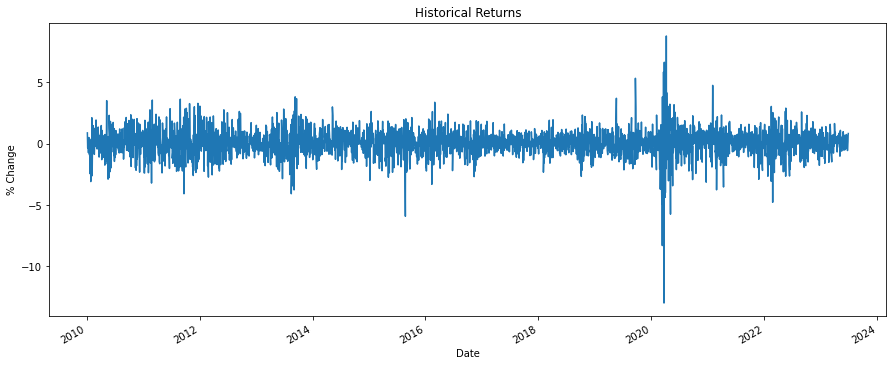

In [3]:
df['Returns_n'] = df.nifty.pct_change(1)*100
df['Sq Returns'] = df['Returns_n'].mul(df['Returns_n'])
df['Returns_n'][1:].plot(figsize = (15,6))
plt.ylabel('% Change')
plt.title('Historical Returns')

Text(0.5, 1.0, 'Volatility')

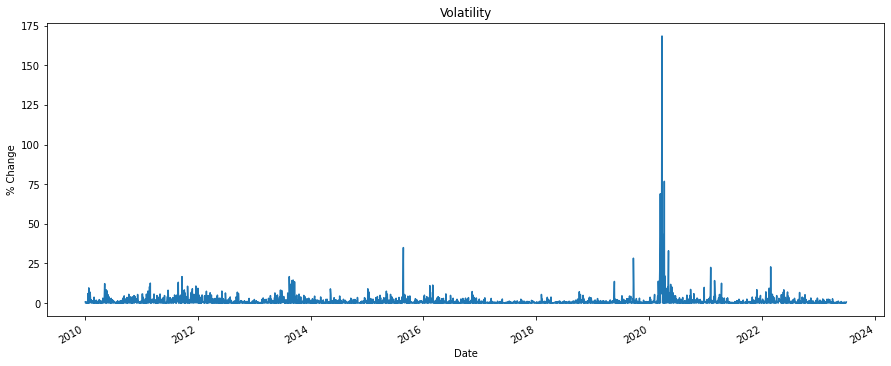

In [4]:
df['Sq Returns'][1:].plot(figsize = (15,6))
plt.ylabel('% Change')
plt.title('Volatility')

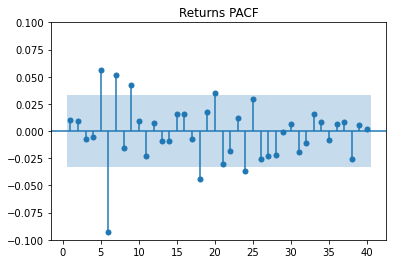

In [5]:
sgt.plot_pacf(df['Returns_n'][1:],zero = False,lags = 40)
plt.title("Returns PACF")
plt.ylim(-0.1,0.1)
plt.show()

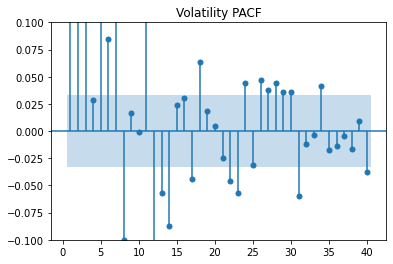

In [6]:
sgt.plot_pacf(df['Sq Returns'][1:],zero = False,lags = 40)
plt.title("Volatility PACF")
plt.ylim(-0.1,0.1)
plt.show()

# ARCH

In [7]:
model_arch_1 = arch_model(df['Returns_n'][1:], mean = 'constant', vol = 'ARCH', p = 9).fit(update_freq = 5)
model_arch_1.summary()

Iteration:      5,   Func. Count:     72,   Neg. LLF: 5371.330447080227
Iteration:     10,   Func. Count:    141,   Neg. LLF: 4906.746764316468
Iteration:     15,   Func. Count:    209,   Neg. LLF: 4744.025454594885
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4718.189857237512
            Iterations: 19
            Function evaluations: 259
            Gradient evaluations: 19


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:              Returns_n   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:               -4718.19
Distribution:                  Normal   AIC:                           9458.38
Method:            Maximum Likelihood   BIC:                           9526.09
                                        No. Observations:                 3481
Date:                Thu, Jun 29 2023   Df Residuals:                     3480
Time:                        11:59:54   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0714  1.526e-02      4.675  2.937e-06 [4.145e-02,  0.101]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.3351  3.452e-02      9.705  2.872e-22     [  0.267,  0.403]
alpha[1]       0.0459  1.806e-02      2.543  1.099e-02 [1.053e-02,8.130e-02]
alpha[2]       0.1053  2.677e-02      3.934  8.352e-05   [5.286e-02,  0.158]
alpha[3]       0.1007  3.369e-02      2.989  2.803e-03   [3.466e-02,  0.167]
alpha[4]       0.0748  2.641e-02      2.832  4.626e-03   [2.303e-02,  0.127]
alpha[5]       0.0491  2.020e-02      2.433  1.499e-02 [9.548e-03,8.872e-02]
alpha[6]       0.0761  2.905e-02      2.619  8.825e-03   [1.914e-02,  0.133]
alpha[7]       0.0824  2.208e-02      3.732  1.901e-04   [3.912e-02,  0.126]
alpha[8]       0.0782  2.984e-02      2.619  8.828e-03   [1.966e-02,  0.137]
alpha[9]       0.0733  2.459e-02      2.983  2.859e-03   [2.514e-02,  0.122]
============================================================================

Covariance estimator: robust
"""

# GARCH

In [8]:
model_garch_56 = arch_model(df['Returns_n'][1:], mean = 'constant', vol = 'GARCH', p = 5,q = 6).fit(update_freq = 5)
model_garch_56.summary()

Iteration:      5,   Func. Count:     84,   Neg. LLF: 6865.589678750479
Iteration:     10,   Func. Count:    162,   Neg. LLF: 4701.478576376083
Iteration:     15,   Func. Count:    236,   Neg. LLF: 4711.179004294581
Iteration:     20,   Func. Count:    308,   Neg. LLF: 4690.731928092428
Iteration:     25,   Func. Count:    378,   Neg. LLF: 4690.548374503469
Optimization terminated successfully    (Exit mode 0)
            Current function value: 4690.547261968154
            Iterations: 29
            Function evaluations: 433
            Gradient evaluations: 29


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Returns_n   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -4690.55
Distribution:                  Normal   AIC:                           9407.09
Method:            Maximum Likelihood   BIC:                           9487.11
                                        No. Observations:                 3481
Date:                Thu, Jun 29 2023   Df Residuals:                     3480
Time:                        11:59:54   Df Model:                            1
                                Mean Model                                
==========================================================================
                 coef    std err          t      P>|t|    95.0% Conf. Int.
--------------------------------------------------------------------------
mu             0.0738  1.502e-02      4.917  8.780e-07 [4.441e-02,  0.103]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega          0.0669  5.474e-02      1.222      0.222  [-4.042e-02,  0.174]
alpha[1]       0.0435  1.545e-02      2.814  4.885e-03 [1.320e-02,7.377e-02]
alpha[2]       0.0992  4.098e-02      2.422  1.545e-02   [1.892e-02,  0.180]
alpha[3]       0.0858      0.114      0.750      0.453     [ -0.138,  0.310]
alpha[4]       0.0468  7.775e-02      0.602      0.547     [ -0.106,  0.199]
alpha[5]       0.0137  4.597e-02      0.297      0.766  [-7.644e-02,  0.104]
beta[1]        0.0000      0.922      0.000      1.000     [ -1.807,  1.807]
beta[2]    6.4083e-10      0.523  1.226e-09      1.000     [ -1.024,  1.024]
beta[3]    1.0031e-09      0.203  4.950e-09      1.000     [ -0.397,  0.397]
beta[4]        0.6516      0.231      2.815  4.872e-03     [  0.198,  1.105]
beta[5]        0.0000      0.456      0.000      1.000     [ -0.893,  0.893]
beta[6]    2.4197e-10      0.298  8.127e-10      1.000     [ -0.584,  0.584]
============================================================================

Covariance estimator: robust
"""

In [9]:
def LLR_TEST(mod_1,mod_2,DF = 1):
    L1 = mod_1.loglikelihood
    L2 = mod_2.loglikelihood
    LR = 2*(L2-L1)
    P = chi2.sf(LR,DF).round(3)
    return P

In [10]:
print('Log likelihood of ARCH(1) is:' + str(model_arch_1.loglikelihood))
print('\nLog likelihood of GARCH(5,6) is:' + str(model_garch_56.loglikelihood))

Log likelihood of ARCH(1) is:-4718.189857237512

Log likelihood of GARCH(5,6) is:-4690.547261968154


In [11]:
LLR_TEST(model_arch_1,model_garch_56)

0.0

# Forecast

In [12]:
start = '2020-06-29'
end = '2020-07-24'
model_garch_56 = arch_model(df['Returns_n'][1:], mean = 'constant', vol = 'GARCH', p = 5,q = 6).fit(last_obs = start, update_freq = 10)
model_garch_56.summary()

Iteration:     10,   Func. Count:    161,   Neg. LLF: 3672.8247664659493
Iteration:     20,   Func. Count:    305,   Neg. LLF: 3660.642282129824
Optimization terminated successfully    (Exit mode 0)
            Current function value: 3660.6422820917
            Iterations: 20
            Function evaluations: 305
            Gradient evaluations: 20


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:              Returns_n   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -3660.64
Distribution:                  Normal   AIC:                           7347.28
Method:            Maximum Likelihood   BIC:                           7424.01
                                        No. Observations:                 2702
Date:                Thu, Jun 29 2023   Df Residuals:                     2701
Time:                        12:20:28   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0663  1.687e-02      3.930  8.493e-05 [3.323e-02,9.935e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega          0.0615      0.375      0.164      0.870      [ -0.673,  0.796]
alpha[1]       0.0310  2.559e-02      1.211      0.226 [-1.917e-02,8.116e-02]
alpha[2]       0.0982      0.228      0.430      0.667      [ -0.349,  0.546]
alpha[3]       0.0749      0.606      0.124      0.902      [ -1.114,  1.264]
alpha[4]       0.0306      0.449  6.817e-02      0.946      [ -0.849,  0.910]
alpha[5]   4.4260e-03      0.176  2.521e-02      0.980      [ -0.340,  0.349]
beta[1]    1.3749e-13      6.594  2.085e-14      1.000      [-12.924, 12.924]
beta[2]        0.4524      1.046      0.433      0.665      [ -1.597,  2.502]
beta[3]    1.3076e-13      2.525  5.179e-14      1.000      [ -4.948,  4.948]
beta[4]        0.2551      0.845      0.302      0.763      [ -1.401,  1.911]
beta[5]    1.6303e-13      2.601  6.268e-14      1.000      [ -5.098,  5.098]
beta[6]    1.3450e-13      0.438  3.068e-13      1.000      [ -0.859,  0.859]
=============================================================================

Covariance estimator: robust
"""

<function matplotlib.pyplot.show(close=None, block=None)>

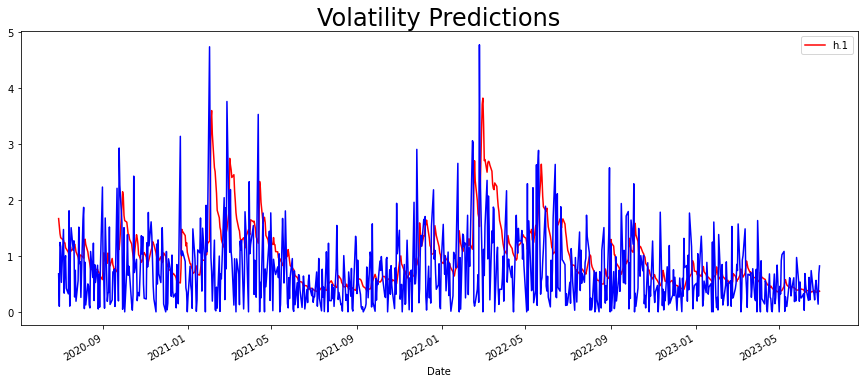

In [20]:
pred_garch = model_garch_56.forecast(horizon = 1, align = 'target')

pred_garch.residual_variance[start:].plot(figsize = (15,6), color = 'red', zorder = 2)
df['Returns_n'][start:].abs().plot(color ='blue')
plt.title('Volatility Predictions', size = 24)
plt.show

In [23]:
pred_garch = model_garch_56.forecast(horizon = 100, align = 'target')
pred_garch.residual_variance[-1:]

,h.001,h.002,h.003,h.004,h.005,h.006,h.007,h.008,h.009,h.010,...,h.091,h.092,h.093,h.094,h.095,h.096,h.097,h.098,h.099,h.100
Date,,,,,,,,,,,,,,,,,,,,,
2023-06-28,0.368877,0.369123,0.404828,0.400602,0.408756,0.436142,0.46359,0.477262,0.469322,0.483165,...,1.04917,1.050882,1.053736,1.061586,1.066635,1.064853,1.068489,1.075462,1.083322,1.084255
